In [2]:
from PIL import Image, ImageFilter
from matplotlib.pyplot import imshow
import numpy as np
import pickle
import os

In [3]:
label_dic = {
    'nonpoisonous' : 0,
    'poisonous' : 1
}

In [4]:
image_set = {}
resizing = (64, 64)

for label in label_dic:
    image_dir = os.getcwd() + '/image/' + label
    labeled_image = []

    for path, dir, files in os.walk(image_dir):
        for file in files:
            image_dir = path + '/' + file
            img = Image.open(image_dir)
            img = img.resize(resizing)
            if not img.format == "RGB": # 이미지의 포맷이 RGB가 아닐 경우, RGB로 convert 시킴
                img = img.convert("RGB")
            labeled_image.append(np.array(img))
    
    image_set[label] = np.array(labeled_image)

In [5]:
train_class_size = 1000
test_class_size = 100

data_set = {
    'train_image' : np.empty((1,resizing[0],resizing[1],3)),
    'train_label' : np.empty(1),
    'test_image' : np.empty((1,resizing[0],resizing[1],3)),
    'test_label' : np.empty(1)
}

for label in image_set:
    label_index = np.random.randint(len(image_set[label]), size=train_class_size + test_class_size)
    
    train_image = image_set[label][label_index[:train_class_size]]
    test_image = image_set[label][label_index[test_class_size:]]
    train_label = np.repeat(label_dic[label], train_class_size)
    test_label = np.repeat(label_dic[label], test_class_size)
    
    data_set['train_image'] = np.concatenate((data_set['train_image'], train_image), axis = 0)
    data_set['test_image'] = np.concatenate((data_set['test_image'], test_image), axis = 0)
    data_set['train_label'] = np.concatenate((data_set['train_label'], train_label), axis = 0)
    data_set['test_label'] = np.concatenate((data_set['test_label'], test_label), axis = 0)

data_set['train_image'] = data_set['train_image'][1:]
data_set['train_label'] = data_set['train_label'][1:]
data_set['test_image'] = data_set['test_image'][1:]
data_set['test_label'] = data_set['test_label'][1:]

In [6]:
print(data_set['train_image'][0].shape)

(64, 64, 3)


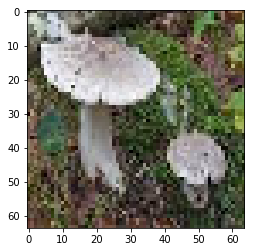

In [7]:
img = Image.fromarray(data_set['train_image'][1001], 'RGB')
%matplotlib inline
imshow(data_set['train_image'][1001]/255)

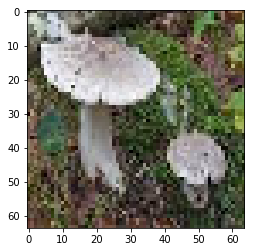

In [8]:
imshow(train_image[1]/255)

In [9]:
pickle.dump(data_set, open("mushroom.p", "wb"))

In [10]:
import json

In [11]:
parameter_set = {
    'label_dic' : {
    'nonpoisonous' : 0,
    'poisonous' : 1
    },
    'resizing' : [64,64],
    'train_class_size' : 1000,
    'test_class_size' : 100
}

In [12]:
parameter_set['resizing']

[64, 64]

In [19]:
p = json.dumps(parameter_set, indent = 4)

In [25]:
with open('test.json', 'w') as f:
    f.write(p)